# **Machine Learning using Python**
#### Title: **Linear Regression with `NumPy`**

##### Author: **`Bilal KACEL`**
##### Version: 1.0.0

## **1. Import dependencies...**

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## **2. Dataset**

Let's generate a dataset

In [2]:
# x: Matrix of Features
# y: Matrix of Target

x, y = make_regression(n_samples=100, n_features=1, noise=10)

Display data

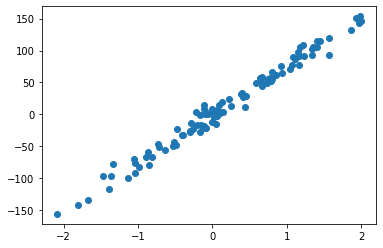

In [3]:
plt.scatter(x, y)

Check the sample's shape: 100 rows/examples (of 1 feature)

In [4]:
x.shape

(100, 1)

Check the target's shape: 100 (for the previous 100 rows)

In [5]:
y.shape

(100,)

We need to specify explicitly that the target shape has one column

In [6]:
y = y.reshape(y.shape[0], 1)
y.shape

(100, 1)

Creation of the matrix X with the biais column with ones (at the right side)

In [7]:
X = np.hstack(( x, np.ones(x.shape) ))
X.shape

(100, 2)

Let's see what's the head of the data

In [8]:
print(X[:5])

[[-0.85271763  1.        ]
 [-0.08404607  1.        ]
 [ 0.7418105   1.        ]
 [ 1.11107632  1.        ]
 [ 0.66327235  1.        ]]


Initialization of the parameter vector $\theta$

In [9]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

In [10]:
print(theta)

[[-0.11629347]
 [ 0.60090376]]


Until here, we get: 
*   $X$ : matrix of Features
*   $y$ : matrix of Target
*   $\theta$ : matrix of Parameters


## **3. Model**

As we would like to implement a `Linear Regression` then the model to create corresponds to the linear function: **$F = X . \theta$**

In [11]:
def model(X, theta):

    return X.dot(theta)

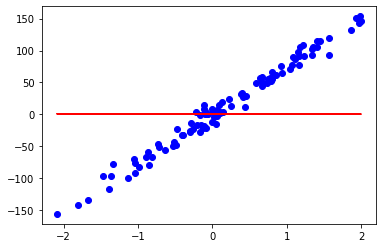

In [12]:
plt.scatter(x, y, c='b')
plt.plot(x, model(X, theta), c='r')

## **4. Loss (cost function)**

Here, we choose to use the **`MSE`**: ***Mean Squared Error***:

$$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $$


In [13]:
def cost_function(X, y, theta):
    m = len(y) # m: nb of examples in the dataset = 100
    
    return 1/(2*m) * np.sum( (model(X, theta) - y)**2 )

Let's test the loss value for this (not performing) model

In [14]:
cost_function(X, y, theta)

2536.1224417964927

## **5. Gradient Descent**

Calculation of the gradients:

$$ \frac{\partial J(\theta)}{\partial(\theta)} = \frac{1}{m} . X^T . (X.\theta - y)$$

In [15]:
def grad(X, y, theta):
    m = len(y)
    
    return 1/m * X.T.dot(model(X, theta) - y)

Implementation of the Gradient Descent algorithm:

$$ \theta = \theta - \alpha . \frac{\partial J(\theta)}{\partial(\theta)}$$

In [16]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - (learning_rate * grad(X, y, theta)) # iterative update of the parameters vector 'theta'
        cost_history[i] = cost_function(X, y, theta) # Historization of the losses during the interations
        
    return theta, cost_history

## **6. Model Training**

In [17]:
# Test 1
# theta_final = gradient_descent(X, y, theta, learning_rate=0.001, n_iterations=1000)

# Test 2
learning_rate = 0.01
n_iterations = 1000

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [18]:
theta_final.shape

(2, 1)

In [19]:
print(theta_final)

[[75.37284994]
 [-0.27032942]]


## **7. Predictions**

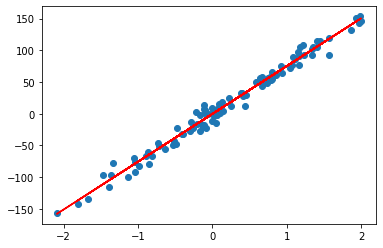

In [20]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

## **8. Learning curve**

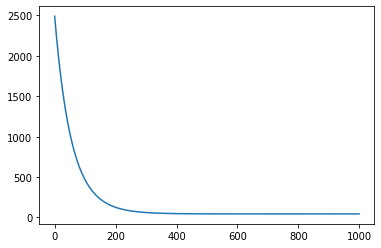

In [21]:
plt.plot(range(n_iterations), cost_history)

## **9. Evaluation**

To evaluate the performance of the model, we can use the ***Determination coefficient***:

$$ R^2 = 1 - \frac{\sum(y - f(x))^2 }{\sum(y - \bar y )^2} $$

In [22]:
def coef_determination(y, pred):
    
    u = ( (y - pred)**2 ).sum()
    v = ( (y - y.mean())**2 ).sum()
    
    return 1 - (u / v)

In [23]:
coef_determination(y, predictions)

0.982037231328221

Looking to the result, our model "seems" to perform at 93%